In [ ]:
#importing needed libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
df = pd.read_csv("D:\College FCDS/Breast_Cancer_status.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Mega Store\AppData\Local\Temp\ipykernel_8264\968400309.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("D:\College FCDS/Breast_Cancer_status.csv")


In [3]:
#a look on the dataset
df.head(10)

,Age,Tumor Size,Estrogen Status,Progesterone Status,Survival Months,Status
0,68,4,Positive,Positive,60,Alive
1,50,35,Positive,Positive,62,Alive
2,58,63,Positive,Positive,75,Alive
3,58,18,Positive,Positive,84,Alive
4,47,41,Positive,Positive,50,Alive
5,51,20,Positive,Positive,89,Alive
6,51,8,Positive,Positive,54,Alive
7,40,30,Positive,Positive,14,Dead
8,40,103,Positive,Positive,70,Alive
9,69,32,Positive,Positive,92,Alive


In [5]:
#Encoding categorical variables to be numerical, which are (Progesterone Status - Survival Months - Status)
le = LabelEncoder()
df['Estrogen Status'] = le.fit_transform(df['Estrogen Status'])  # Positive = 1, Negative = 0
df['Progesterone Status'] = le.fit_transform(df['Progesterone Status'])

# Encode 'Status' column manually (Alive = 1, Dead = 0)
df['Status'] = df['Status'].map({'Alive': 1, 'Dead': 0})

# Preview the encoded dataframe
print(df.head(8))

   Age  Tumor Size  Estrogen Status  Progesterone Status  Survival Months  \
0   68           4                1                    1               60   
1   50          35                1                    1               62   
2   58          63                1                    1               75   
3   58          18                1                    1               84   
4   47          41                1                    1               50   
5   51          20                1                    1               89   
6   51           8                1                    1               54   
7   40          30                1                    1               14   

   Status  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       0  


In [6]:
#checking if there null values
print(df.isnull().sum())

Age                    0
Tumor Size             0
Estrogen Status        0
Progesterone Status    0
Survival Months        0
Status                 0
dtype: int64


In [7]:
#checking to see if the dataset features needs scalling or not
df.describe()

,Age,Tumor Size,Estrogen Status,Progesterone Status,Survival Months,Status
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,0.933151,0.826541,71.297962,0.846918
std,8.963134,21.119696,0.249791,0.378691,22.921430,0.360111
min,30.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,16.000000,1.000000,1.000000,56.000000,1.000000
50%,54.000000,25.000000,1.000000,1.000000,73.000000,1.000000
75%,61.000000,38.000000,1.000000,1.000000,90.000000,1.000000
max,69.000000,140.000000,1.000000,1.000000,107.000000,1.000000


In [6]:
# Features (X) and Target (y)
X = df.drop('Status', axis=1)  # all columns except the target
y = df['Status']               # target column (alive=1, dead=0)

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of each set
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3219, 5)
X_test shape: (805, 5)
y_train shape: (3219,)
y_test shape: (805,)


In [ ]:
#Feature Scaling (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Split into train (60%) and temporarily (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42, stratify=y)

In [ ]:
#Split temporarily into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))

Train size: 2414
Validation size: 805
Test size: 805


***Fine tuning hyperparameter***

In [ ]:
#Try different K values on validation set
#Import necessary libraries

from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = list(range(1, 21))
val_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    val_scores.append(acc)
    print(f"K={k}, Validation Accuracy: {acc:.4f}")

K=1, Validation Accuracy: 0.8360
K=2, Validation Accuracy: 0.7826
K=3, Validation Accuracy: 0.8845
K=4, Validation Accuracy: 0.8634
K=5, Validation Accuracy: 0.8845
K=6, Validation Accuracy: 0.8845
K=7, Validation Accuracy: 0.8894
K=8, Validation Accuracy: 0.8870
K=9, Validation Accuracy: 0.8857
K=10, Validation Accuracy: 0.8894
K=11, Validation Accuracy: 0.8845
K=12, Validation Accuracy: 0.8882
K=13, Validation Accuracy: 0.8857
K=14, Validation Accuracy: 0.8894
K=15, Validation Accuracy: 0.8870
K=16, Validation Accuracy: 0.8894
K=17, Validation Accuracy: 0.8845
K=18, Validation Accuracy: 0.8882
K=19, Validation Accuracy: 0.8857
K=20, Validation Accuracy: 0.8894


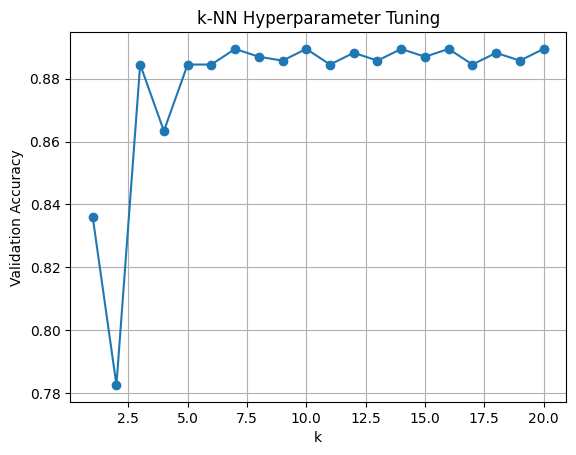

In [11]:
import matplotlib.pyplot as plt
plt.plot(k_values, val_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("k-NN Hyperparameter Tuning")
plt.grid()
plt.show()


In [ ]:
#Select best K
import numpy as np
best_k = k_values[np.argmax(val_scores)]
print("\nBest K value:", best_k)


Best K value: 7


In [ ]:
from sklearn.model_selection import cross_val_score

final_knn = KNeighborsClassifier(n_neighbors=best_k)

# 5-fold cross-validation
cv_scores = cross_val_score(final_knn, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation accuracies for each fold:", cv_scores)
print("Average cross-validation accuracy:", cv_scores.mean())


Cross-validation accuracies for each fold: [0.89648033 0.88612836 0.91097308 0.90062112 0.87759336]
Average cross-validation accuracy: 0.8943592519093151


In [16]:
best_val_acc = max(val_scores)
print("Best Validation Accuracy:", best_val_acc)


Best Validation Accuracy: 0.8894409937888199


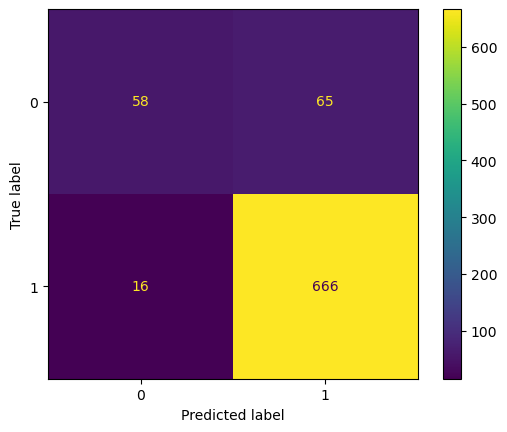

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

final_knn.fit(X_train, y_train)

# Predict on y test
y_test_pred = final_knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy:", acc)
print("precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)


Accuracy: 0.8993788819875776
precision: 0.9110807113543091
Recall: 0.9765395894428153
F1-score: 0.9426751592356688


***Model training with the best value of the hyperparameter***

In [13]:
# Combine training and validation sets
X_train_full = np.vstack((X_train, X_val))
y_train_full = np.concatenate((y_train, y_val))

# Train the final model with best k
best_k = 7
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_full, y_train_full)

# Evaluate on training set
y_train_pred = knn_final.predict(X_train_full)
train_acc = accuracy_score(y_train_full, y_train_pred)

# Evaluate on test set
y_test_pred = knn_final.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Training Accuracy with k={best_k}: {train_acc:.4f}")
print(f"Test Accuracy with k={best_k}: {test_acc:.4f}")


Training Accuracy with k=7: 0.9080
Test Accuracy with k=7: 0.9019
